In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from src.data_loader import load_and_align_prices
from src.stats import (
    engle_granger_test,
    estimate_hedge_ratio,
    compute_spread,
    adf_test,
    half_life
)

plt.style.use("seaborn-v0_8")

In [3]:
prices = load_and_align_prices(
    "../data/gold.csv",
    "../data/silver.csv"
)


In [4]:
coint_result = engle_granger_test(
    prices["gold"],
    prices["silver"]
)

coint_result


{'test_statistic': np.float64(-3.1153520201868026),
 'p_value': np.float64(0.08526081637721661)}

In [5]:
hedge_ratio = estimate_hedge_ratio(
    prices["gold"],
    prices["silver"]
)

hedge_ratio


/Users/tanmaygarg/Desktop/gold_silver_strategy/src/stats.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]


np.float64(0.8398666970367117)

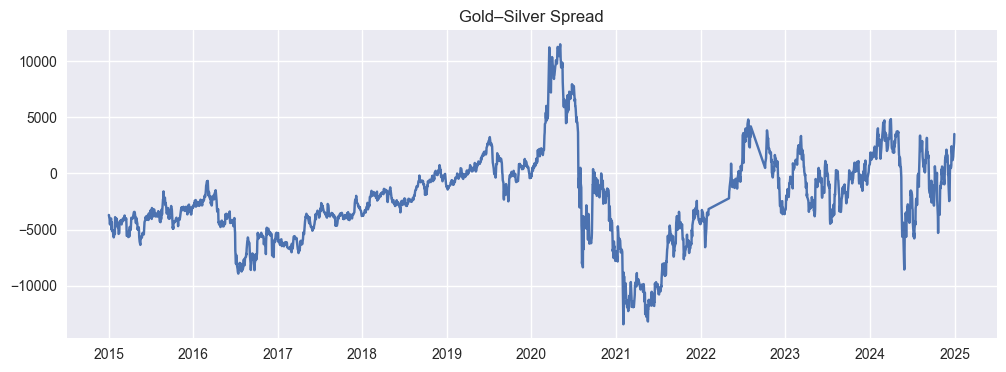

In [6]:
spread = compute_spread(
    prices["gold"],
    prices["silver"],
    hedge_ratio
)

plt.figure(figsize=(12, 4))
plt.plot(spread)
plt.title("Gold–Silver Spread")
plt.savefig("../results/figures/gold_silver_spread.png",
            dpi=300,
            bbox_inches="tight")
plt.show()


In [7]:
adf_result = adf_test(spread)

adf_result


{'adf_statistic': np.float64(-3.1143760733210906),
 'p_value': np.float64(0.025507426097298832)}

In [8]:
hl = half_life(spread)
hl


np.float64(69.69837286756666)

In [14]:
import json
import pandas as pd
from pathlib import Path

stats_summary = {
    "hedge_ratio": float(hedge_ratio),
    "engle_granger": {
        "test_statistic": float(coint_result["test_statistic"]),
        "p_value": float(coint_result["p_value"])
    },
    "adf_on_spread": {
        "test_statistic": float(adf_result["adf_statistic"]),
        "p_value": float(adf_result["p_value"])
    },
    "half_life_days": float(hl)
}

output_dir = Path("../results")
output_dir.mkdir(exist_ok=True)

with open(output_dir / "statistical_summary.json", "w") as f:
    json.dump(stats_summary, f, indent=4)


summary_table = pd.DataFrame({
    "Metric": [
        "Hedge Ratio (β)",
        "Engle–Granger p-value",
        "ADF p-value (Spread)",
        "Half-life (days)"
    ],
    "Value": [
        stats_summary["hedge_ratio"],
        stats_summary["engle_granger"]["p_value"],
        stats_summary["adf_on_spread"]["p_value"],
        stats_summary["half_life_days"]
    ]
})

summary_table


,Metric,Value
0,Hedge Ratio (β),0.839867
1,Engle–Granger p-value,0.085261
2,ADF p-value (Spread),0.025507
3,Half-life (days),69.698373
